In [7]:
# importing necessary libraries for analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm 
from scipy.stats import pearsonr
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
from pandas_ml import ConfusionMatrix
from sklearn.metrics import confusion_matrix
import itertools

# Use ggplot style for visulizations
plt.style.use('ggplot')

In [8]:
# Import Syph data
data = pd.read_excel('Syph1.xlsx', index=False)

# Read the required columns
data = data[['sample_id', 'data_1', 'cutoff_1', 'data_2', 'cutoff_2']]

# Set new column names
data.columns = [['id', 'evo_data', 'evo_resp', 'rmp_data', 'rmp_resp']]

# Change negative and positive values to 0 and 1 respectively 
data = data.replace('POSITIVE', 1)
data = data.replace('Negative', 0)


# Print columns and head
print(data.columns)
data.head()

Index(['id', 'evo_data', 'evo_resp', 'rmp_data', 'rmp_resp'], dtype='object')


,id,evo_data,evo_resp,rmp_data,rmp_resp
0,17V0160300,0.06,0,0.02,0
1,17V0161263,0.18,0,0.02,0
2,17V0161328,0.06,0,0.02,0
3,17V0161690,0.06,0,0.02,0
4,17V0161691,0.06,0,0.02,0


In [9]:
# Describe the 5 point statistics of the dataset
print(data.evo_data.describe())

count    378.000000
mean       0.128889
std        0.341893
min        0.060000
25%        0.070000
50%        0.070000
75%        0.080000
max        3.630000
Name: evo_data, dtype: float64


In [10]:
# Describe the 5 point statistics of the dataset
print(data.rmp_data.describe())

count    378.000000
mean       0.064087
std        0.277719
min        0.010000
25%        0.010000
50%        0.020000
75%        0.020000
max        2.437000
Name: rmp_data, dtype: float64


In [11]:
# Describe the 5 point statistics of the dataset
data.describe()

,evo_data,evo_resp,rmp_data,rmp_resp
count,378.000000,378.000000,378.000000,378.000000
mean,0.128889,0.026455,0.064087,0.031746
std,0.341893,0.160697,0.277719,0.175556
min,0.060000,0.000000,0.010000,0.000000
25%,0.070000,0.000000,0.010000,0.000000
50%,0.070000,0.000000,0.020000,0.000000
75%,0.080000,0.000000,0.020000,0.000000
max,3.630000,1.000000,2.437000,1.000000


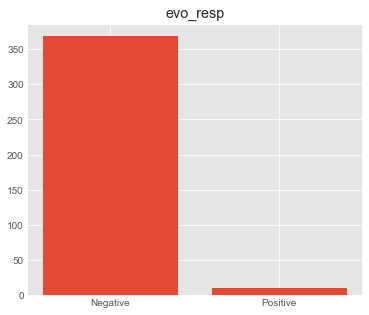

0    368
1     10
Name: evo_resp, dtype: int64

In [12]:
x = np.arange(2)
y =data.evo_resp.value_counts()


from pylab import rcParams
rcParams['figure.figsize'] = 6,5
plt.bar(x, y)
plt.xticks(x, ('Negative', 'Positive'))
plt.title('evo_resp')
plt.show()
y

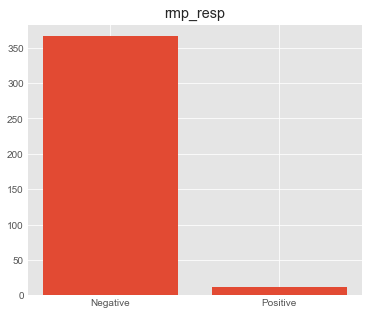

0    366
1     12
Name: rmp_resp, dtype: int64

In [13]:
x = np.arange(2)
y =data.rmp_resp.value_counts()


from pylab import rcParams
rcParams['figure.figsize'] = 6,5
plt.bar(x, y)
plt.xticks(x, ('Negative', 'Positive'))
plt.title('rmp_resp')
plt.show()
y

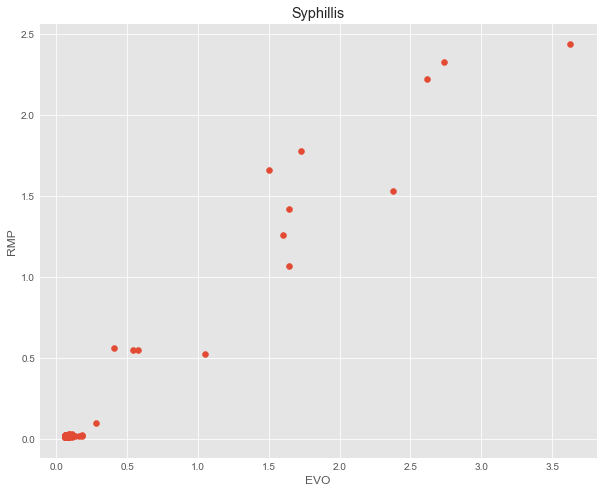

In [14]:
# Scatter plot between evo and rmp data readings 

from pylab import rcParams
rcParams['figure.figsize'] = 10,8
plt.scatter(data.evo_data, data.rmp_data)
plt.xlabel('EVO')
plt.ylabel('RMP')
plt.title('Syphillis')
plt.show()

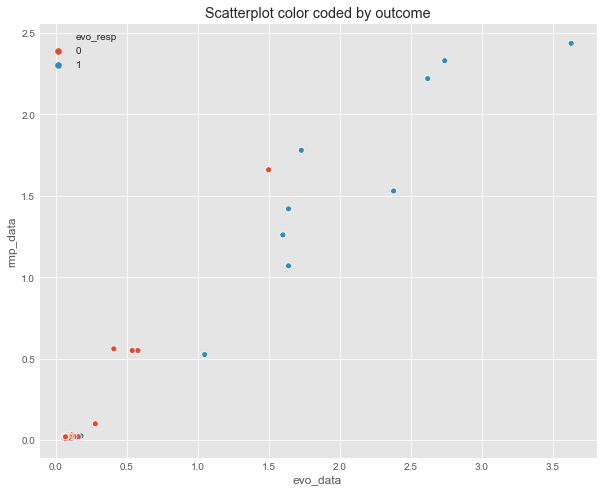

In [15]:
# !conda remove seaborn
# import seaborn as sns
sns.scatterplot(x='evo_data', y='rmp_data', hue='evo_resp', data=data, legend='full' )
plt.title('Scatterplot color coded by outcome')
# plt.legend(data.rmp_data, ['negative', 'positive'])
plt.show()

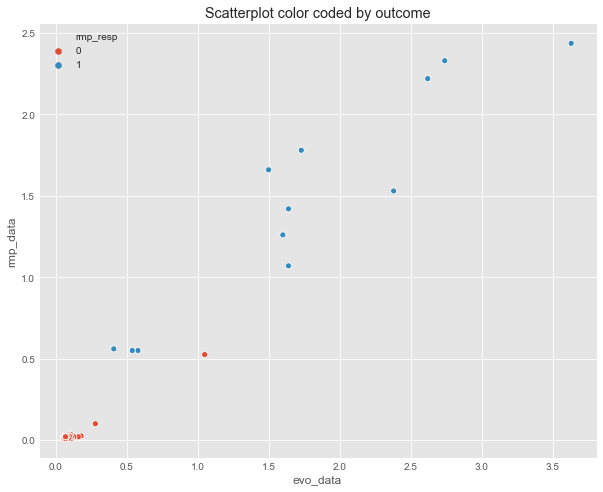

In [16]:
# !conda remove seaborn
# import seaborn as sns
sns.scatterplot(x='evo_data', y='rmp_data', hue='rmp_resp', data=data, legend='full' )
plt.title('Scatterplot color coded by outcome')
# plt.legend(data.rmp_data, ['negative', 'positive'])
plt.show()

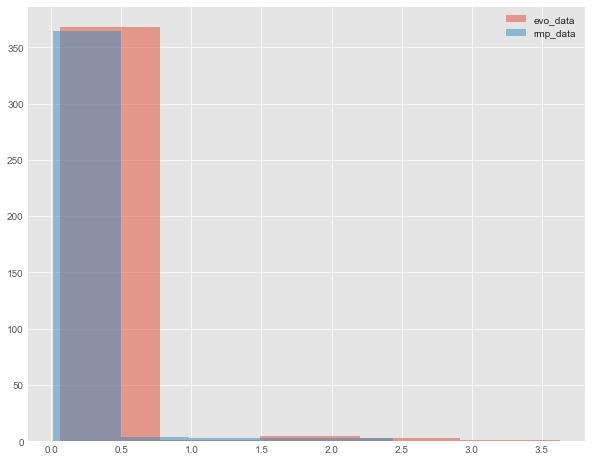

In [17]:
# Plot histograms to inspect the typical values

data['evo_data'].hist(bins=5, label='evo_data', alpha=0.5)
data['rmp_data'].hist(bins=5, label='rmp_data', alpha=0.5)
plt.legend()
plt.show()


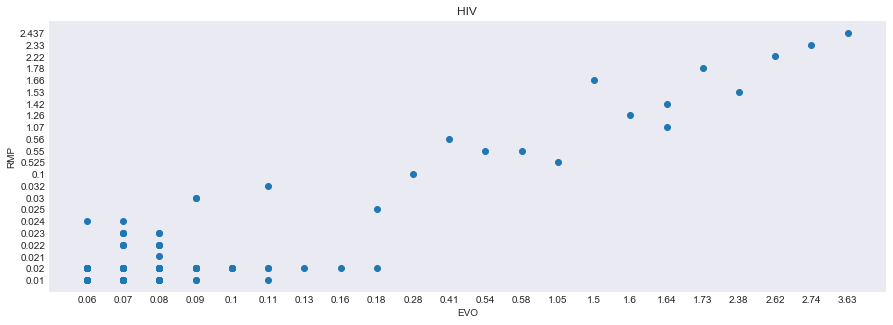

In [14]:
# Scatter plot between evo and rmp data readings 

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
plt.scatter(data.evo_data, data.rmp_data)
plt.xlabel('EVO')
plt.ylabel('RMP')
plt.title('Syphillis')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2171b8d0>]],
      dtype=object)

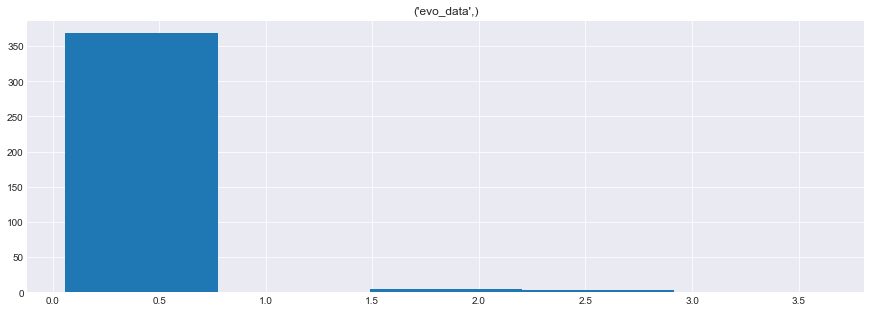

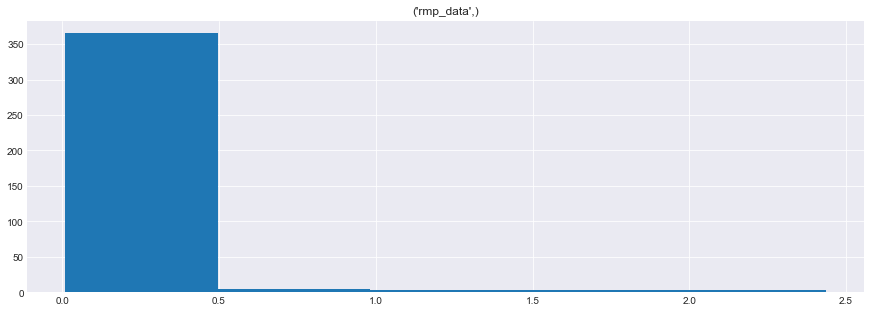

In [15]:
# Plot histograms to inspect the typical values

data['evo_data'].hist(bins=5)
data['rmp_data'].hist(bins=5)


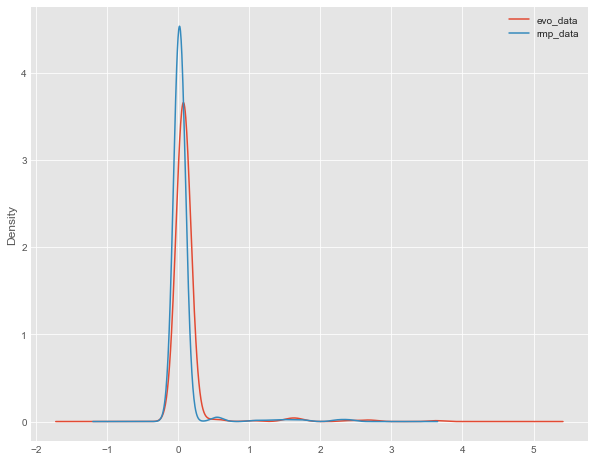

In [20]:
# Plot distributions as overlapping kde plots

kde = data[['evo_data', 'rmp_data']].copy()
kde.plot.kde()
plt.show()

In [25]:
# Convert data to numpy arrays and calculate pearson correlation coefficient

x = np.array(data.evo_data)
y = np.array(data.rmp_data)

In [21]:
plot1 = data.evo_data
plot2 = data.rmp_data
euclidean_distance = sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2 )
euclidean_distance

0.16492422502470644

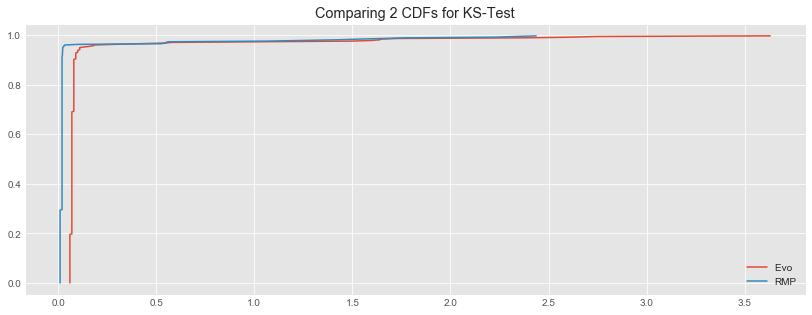

In [22]:
# Plot the CDFs
def ks_plot_comp(data_1, data_2):
    '''
    Data entereted must be the same size.
    '''
    
    data_2 = data_2
    length = len(data_1)
    plt.figure(figsize=(14, 5))
    plt.plot(np.sort(data_1), np.linspace(0, 1, len(data_1), endpoint=False))
    plt.plot(np.sort(data_2), np.linspace(0, 1, len(data_2), endpoint=False))
    plt.legend('top right')
    plt.legend(['Evo ', 'RMP'])
    plt.title('Comparing 2 CDFs for KS-Test')
    plt.show()
    
ks_plot_comp(data.evo_data, data.rmp_data)

In [23]:
from scipy import stats 
stats.ks_2samp(data.evo_data, data.rmp_data)

Ks_2sampResult(statistic=0.96296296296296291, pvalue=1.6782773094038367e-155)

In [26]:
# Pearson Correlation

corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.981


In [27]:
# Effect Size Measurement

# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s


d = cohend(y,x)
print('Cohens d: %.3f' % d)

Cohens d: -0.208


In [28]:
# Run Independant and dependant t-tests 

from scipy import stats
stats.ttest_ind(y,x)

Ttest_indResult(statistic=-2.8602868517499296, pvalue=0.0043495906512894577)

In [29]:
stats.ttest_rel(y,x)

Ttest_relResult(statistic=-14.32204273031862, pvalue=1.8761104770866899e-37)

In [30]:
# Calculate confusion and matrix and diagnosticsa

EVO=np.hstack(np.array(data['evo_resp']))
RMP=np.hstack(np.array(data['rmp_resp']))

cm = ConfusionMatrix(RMP, EVO)
print(cm)
cm.print_stats()

Predicted    0   1  __all__
Actual                     
0          364   2      366
1            4   8       12
__all__    368  10      378
population: 378
P: 12
N: 366
PositiveTest: 10
NegativeTest: 368
TP: 8
TN: 364
FP: 2
FN: 4
TPR: 0.666666666667
TNR: 0.994535519126
PPV: 0.8
NPV: 0.989130434783
FPR: 0.00546448087432
FDR: 0.2
FNR: 0.333333333333
ACC: 0.984126984127
F1_score: 0.727272727273
MCC: 0.722339787326
informedness: 0.661202185792
markedness: 0.789130434783
prevalence: 0.031746031746
LRP: 122.0
LRN: 0.335164835165
DOR: 364.0
FOR: 0.0108695652174


Confusion matrix, without normalization
[[364   2]
 [  4   8]]


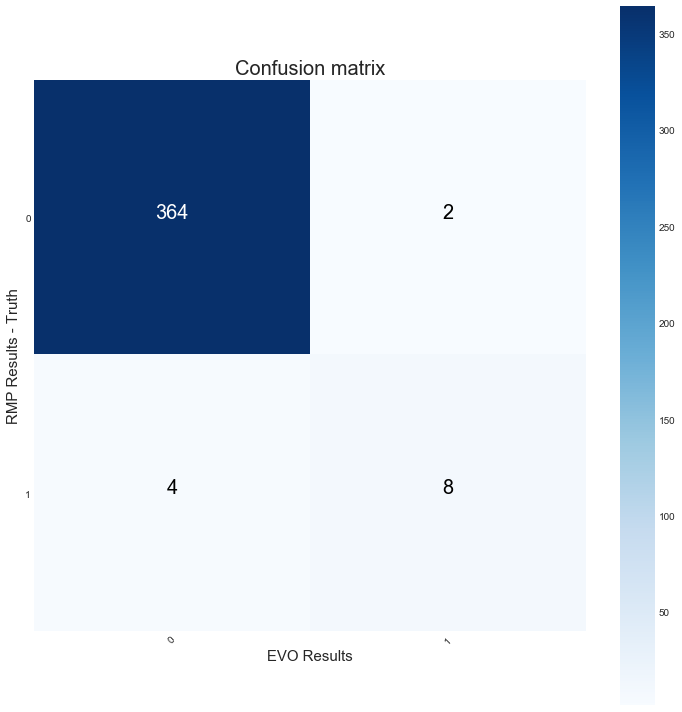

In [23]:
# Draw Confusion matrix for report
# Motivation for this visualization has been taken from stackoverflow discussion at:
# https://stackoverflow.com/questions/48817300/sklearn-plot-confusion-matrix-combined-across-trainingtest-sets

from pylab import rcParams
rcParams['figure.figsize'] = 10,10

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt ), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('RMP Results - Truth', fontsize=15)
    plt.xlabel('EVO Results', fontsize=15)


cm = confusion_matrix(RMP, EVO)

plt.figure()
plot_confusion_matrix(cm, classes = [0,1], title='Confusion matrix')